# Movie Recommendation. 

"What movies should I watch this weekends?"

Did you ever come up to this confusion? As for me I always do and waste some time in selecting the movies and then actually watching it. The need for movie recommendation has become an important part as we have lots of choices out there. 

An example of movie recommendation system is :

* Person A watches **One day** and **Fault in our stars.**
* Person B search for **One day** and the system recommends **Fault in our stars.**

Recommendation systems are not only used for movies, but on multiple other products and services like Flipkart (Books, Items), Saavan/Spotify (Music), Google (News, Search), YouTube (Videos) , Myntra(Clothes), etc.

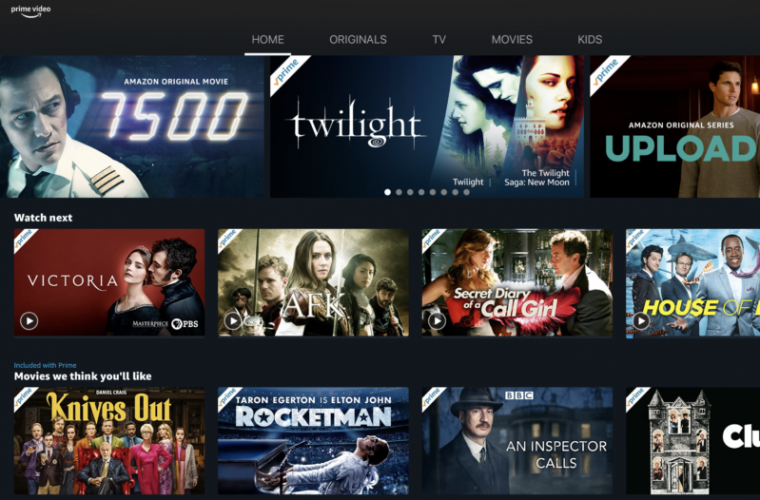

Two most types of personallized recommendation systems are **Content-Based** and **Colabrative Filtering**. Content-Based system provides recommendation directly based on the similarities of items. It focuses on the attributes of the items. Whereas Colabrative Filtering system recommend about the interests of a user by collecting preferences or taste information from many other users, that is it uses the “wisdom of the crowd” to recommend items.

In these notebook I'll implement two systems to recommend movies. 

After reading this post you will know:

1. About the MovieLens dataset problem for recommender system.

2. How to do exploratory data analysis.

3. The 2 different types of recommendation engines.

4. How to develop a content-based recommendation model based on movie genres.

5. How to develop a collaborative filtering model based on user ratings.

### Let’s get started.

# The MovieLens Dataset

One of the most common datasets that is available on the internet for building a Recommender System is the [MovieLens DataSet]
This dataset has (1M) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org/datasets/movielens/), a movie recommendation service. It contains 1,000,209 anonymous ratings and 1093360 tag applications across 3,900 movies. These data were created by 6,040 users.

The data was collected by GroupLens researchers over various periods of time, depending on the size of the set. Users were selected at random for inclusion. All users selected had rated at least 20 movies. Each user is represented by an id, and no other information is provided.

The original data are contained in three files, [movies.dat](https://github.com/khanhnamle1994/movielens/blob/master/dat/movies.dat), [ratings.dat](https://github.com/khanhnamle1994/movielens/blob/master/dat/ratings.dat) and [users.dat](https://github.com/khanhnamle1994/movielens/blob/master/dat/users.dat). To make it easier to work with the data, I converted them into csv files. The process can be viewed in my [Data Processing Notebook](https://github.com/khanhnamle1994/movielens/blob/master/Data_Processing.ipynb).

![movielens](images/movielens.jpg)

## Data Preparation
Let's load this data into Python. I will load the dataset with Pandas onto Dataframes **ratings**, **users**, and **movies**. Before that, I'll also pass in column names for each CSV and read them using pandas (the column names are available in the [Readme](https://github.com/khanhnamle1994/movielens/blob/master/README.md) file).

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv("\\ratings.csv", sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv("\\users.csv", sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv("\\movies.csv", sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

### Lets take a closer look at all the datasets
### Users dataset

In [ ]:
#Checking the top 5 rows
users.head()

In [ ]:
#user file info
print(users.info())

There are 6040 users with 5 attributes of each. 

### Movie dataset

In [ ]:
#Checking the top 5 rows
movies.head()

In [43]:
# movie file info
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


These dataset contains attributes of 3883 movies with 3 columns including movie_id.(title and geners as other) 

### Rating dataset

In [44]:
# Checking the top 5 rows
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [45]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None


These informations conveys that there are 1M ratings as per 1M user and movies.  

## EDA (Exploratory Data Annalysis)
### Titles

There are certain titles of movies which often shows up. Let's perform word-cloud vision and see the most common titles.

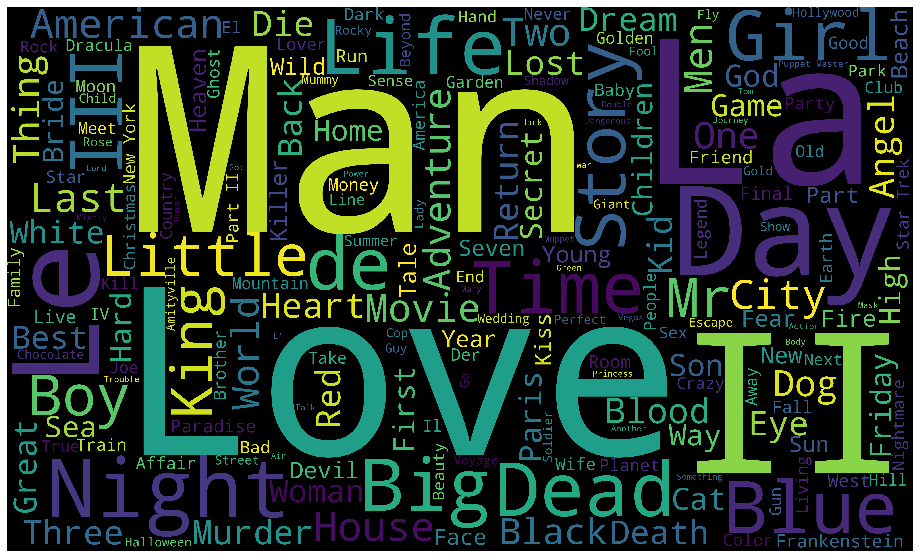

In [46]:
# Importing new libraries 

%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Creating word cloud for movie titles
movies['title'] = movies['title'].fillna("").astype(str)
title_cloud = " ".join(movies['title'])
title_cloud = WordCloud(stopwords= STOPWORDS, background_color = 'black', height=3000, width=5000).generate(title_cloud)

#Plotting the word cloud
plt.figure(figsize=(20,10))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

Remarkable, isn't it? As I can figure out there are lots of sequels and prequels as the word suggest // and ///. Along with this title with Dead, Love, Life, Day, Time, Night are the most common movie titles. 

### Ratings 

Now I want to gather more insighs about Rating dataset by getting information about its summary statistics and distributions. 

In [9]:
# Summary Statistics 

ratings.describe()

,user_id,movie_id,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


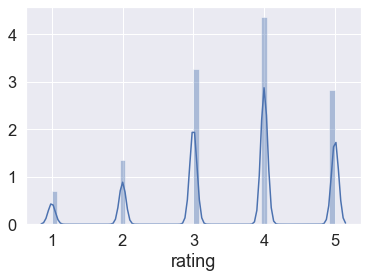

In [10]:
# Import seaborn libraries

import seaborn as sns
sns.set_style('dark')
sns.set(font_scale =1.5)

#Displaying the distribution 
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

The mean rating of the movies are 3.58 on scale on 5. We can see that most of the rating(i.e 50 % and above) is between 4 and 5. Personally I think the 5 scale rating was not a good indicator as most of the user can have different rating styles and having just 5 option can lead to variation in personal aspect. Each user rated at least 20 movies, so I doubt the distribution could be caused just by chance variance in the quality of movies.

Let's also take a look at a subset of 20 movies with the highest rating.

In [11]:
# Joining all 3 files into one dataframe. 
dataset = pd.merge(pd.merge(movies, ratings),users)

# 20 movies with highest ratings.
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


### Genres
The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [12]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:10]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211]]

The top 10 genres are, in that respect order: Drama, Comedy, Action, Thriller, Romance, Horror, Adventure, Sci-Fi, Children, Crime. I'll show this on a wordcloud too in order to make it more visually appealing.

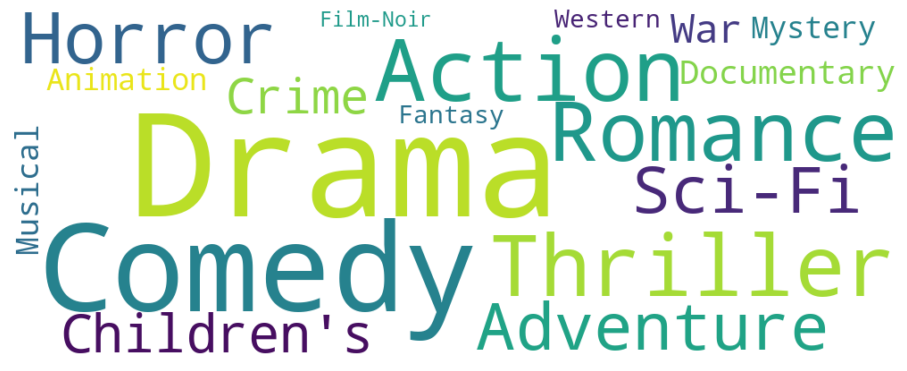

In [13]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Types of Recommendation Engines

### 1. Content-Based
A systems that recommend an item to a user based upon a description of the item and a profile of the user’s interests.
The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it's easy to determine the context/properties of each item.

A content based recommender works with data that the user provides, either explicitly movie ratings for the MovieLens dataset. Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

### 2. Collaborative Filtering
The Collaborative Filtering Recommender is entirely based on the past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes and choices of two users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that. 

For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie 1. This makes it one of the most commonly used algorithm as it is not dependent on any additional information.

In general, collaborative filtering is the workhorse of recommender engines. The algorithm has a very interesting property of being able to do feature learning on its own, which means that it can start to learn for itself what features to use. It can be divided into **Memory-Based Collaborative Filtering** and **Model-Based Collaborative filtering**. In this post, I'll only focus on the Memory-Based Collaborative Filtering technique.

![rec-systems](images/rec-systems.png)

## What are the concepts used in Content Based Recommenders?
The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

## Term Frequency (TF) and Inverse Document Frequency (IDF)
TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

But while calculating TF-IDF, log is used to dampen the effect of high frequency words. For example: TF = 3 vs TF = 4 is vastly different from TF = 10 vs TF = 1000. In other words the relevance of a word in a document cannot be measured as a simple raw count and hence the equation below:
![tfidf](images/tfidf.jpg)

After calculating TF-IDF scores, how do we determine which items are closer to each other, rather closer to the user profile? This is accomplished using the **Vector Space Model** which computes the proximity based on the angle between the vectors.

## How does Vector Space Model works?
In this model, each item is stored as a vector of its attributes (which are also vectors) in an n-dimensional space and the angles between the vectors are calculated to determine the similarity between the vectors. Next, the user profile vectors are also created based on his actions on previous attributes of items and the similarity between an item and a user is also determined in a similar way.
 
 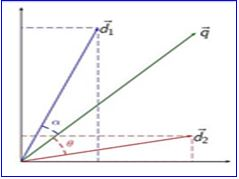

Lets try to understand this with an example.

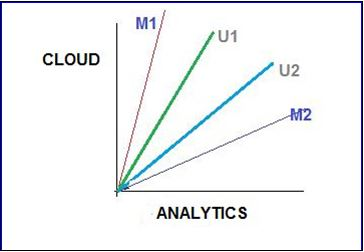

Shown above is a 2-D representation of a two attributes, Cloud & Analytics. M1 & M2 are documents. U1 & U2 are users. The document M2 is more about Analytics than cloud whereas M1 is more about cloud than Analytics. I am sure you want to know how the relative importance of documents are measures. Hold on, we are coming to that.

User U1, likes articles on the topic ‘cloud’ more than the ones on ‘analytics’ and vice-versa for user U2. The method of calculating the user’s likes / dislikes / measures is calculated by taking the **cosine of the angle between the user profile vector(Ui ) and the document vector.**

The ultimate reason behind using cosine is that the value of **cosine will increase with decreasing value of the angle between which signifies more similarity.** The vectors are length normalized after which they become vectors of length 1 and then the **cosine calculation is simply the sum-product of vectors.** 


### Implementation
With all that theory in mind, I am going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file **movies.csv**.

In [14]:
# Breaking up the Big genre string into a string array.
movies['genres'] = movies['genres'].str.split('|')

# Converting string into string value
movies['genres'] = movies['genres'].fillna("").astype('str')

I do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively. In order to do so, I'll use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer="word", ngram_range=(1,2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

I will be using the **[Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html)** to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [16]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

I now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [17]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

Let's try and get the top recommendations for a few movies and see how good the recommendations are.

In [18]:
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

In [19]:
genre_recommendations('Toy Story (1995)').head(20)

1050               Aladdin and the King of Thieves (1996)
2072                             American Tail, An (1986)
2073           American Tail: Fievel Goes West, An (1991)
2285                            Rugrats Movie, The (1998)
2286                                 Bug's Life, A (1998)
3045                                   Toy Story 2 (1999)
3542                                Saludos Amigos (1943)
3682                                   Chicken Run (2000)
3685       Adventures of Rocky and Bullwinkle, The (2000)
236                                 Goofy Movie, A (1995)
12                                           Balto (1995)
241                               Gumby: The Movie (1995)
310                             Swan Princess, The (1994)
592                                      Pinocchio (1940)
612                                Aristocats, The (1970)
700                               Oliver & Company (1988)
876     Land Before Time III: The Time of the Great Gi...
1010          

In [20]:
genre_recommendations('Saving Private Ryan (1998)').head(20)

461            Heaven & Earth (1993)
1204        Full Metal Jacket (1987)
1214     Boat, The (Das Boot) (1981)
1222                    Glory (1989)
1545                G.I. Jane (1997)
1959      Saving Private Ryan (1998)
2358       Thin Red Line, The (1998)
2993         Longest Day, The (1962)
3559            Flying Tigers (1942)
3574    Fighting Seabees, The (1944)
3585    Guns of Navarone, The (1961)
3684             Patriot, The (2000)
40                Richard III (1995)
153            Beyond Rangoon (1995)
332         Walking Dead, The (1995)
523          Schindler's List (1993)
641        Courage Under Fire (1996)
967          Nothing Personal (1995)
979           Michael Collins (1996)
1074                  Platoon (1986)
Name: title, dtype: object

In [21]:
genre_recommendations('American Beauty (1999)').head(20)

44                                     To Die For (1995)
71                          Kicking and Screaming (1995)
74                                      Big Bully (1996)
83                    Last Summer in the Hamptons (1995)
104           Nobody Loves Me (Keiner liebt mich) (1994)
131                                     Nueba Yol (1995)
164                          Doom Generation, The (1995)
203                               Unstrung Heroes (1995)
216                              Boys on the Side (1995)
229                           Eat Drink Man Woman (1994)
232                                       Ed Wood (1994)
301                                     Roommates (1995)
319                          Swimming with Sharks (1995)
341    Adventures of Priscilla, Queen of the Desert, ...
367                                    Paper, The (1994)
368                                 Reality Bites (1994)
446                                   With Honors (1994)
468                            

As you can see, I have quite a decent list of recommendation for **Good Will Hunting** (Drama), **Toy Story** (Animation, Children's, Comedy), and **Saving Private Ryan** (Action, Thriller, War) and **American Beauty** (Comedy, Drama) 

Overall, here are the pros of using content-based recommendation:
* No need for data on other users, thus no cold-start or sparsity problems.
* Can recommend to users with unique tastes.
* Can recommend new & unpopular items.
* Can provide explanations for recommended items by listing content-features that caused an item to be recommended (in this case, movie genres)

However, there are some cons of using this approach:
* Finding the appropriate features is hard.
* Does not recommend items outside a user's content profile.
* Unable to exploit quality judgments of other users.

**Limitation:**

They are not good at capturing inter-dependencies or complex behaviors. For example: I might like articles on Machine Learning, only when they include practical application along with the theory, and not just theory. This type of information cannot be captured by these recommenders.

## Collaborative Filtering Recommendation Model

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.  I will use Memory-Based Collaborative Filtering to make recommendations to movie users.

### Theory
There are 2 main types of memory-based collaborative filtering algorithms:
1. **User-User Collaborative Filtering**: This algorithm first finds the similarity score between users. Based on this similarity score, it then picks out the most similar users and recommends products which these similar users have liked or bought previously. This algorithm is very effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

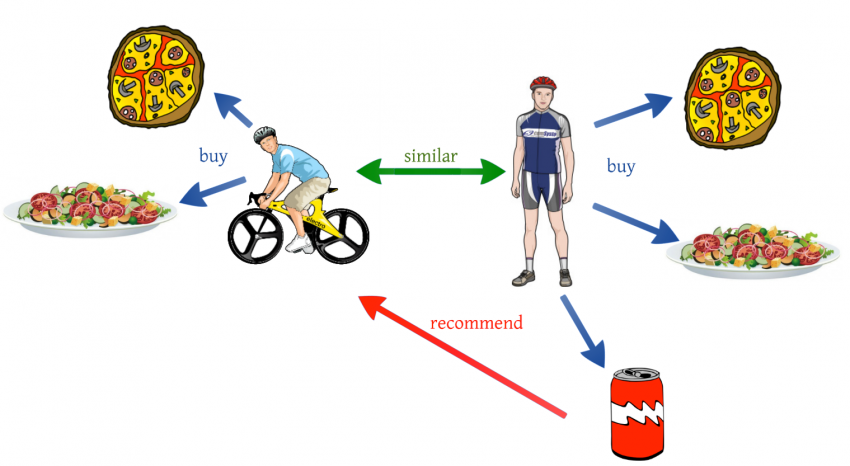

2. **Item-Item Collaborative Filtering**: It is quite similar to previous algorithm, but instead of finding user's look-alike, we try finding movie's look-alike. Once we have movie's look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users. And with fixed number of movies, movie-movie look alike matrix is fixed over time.

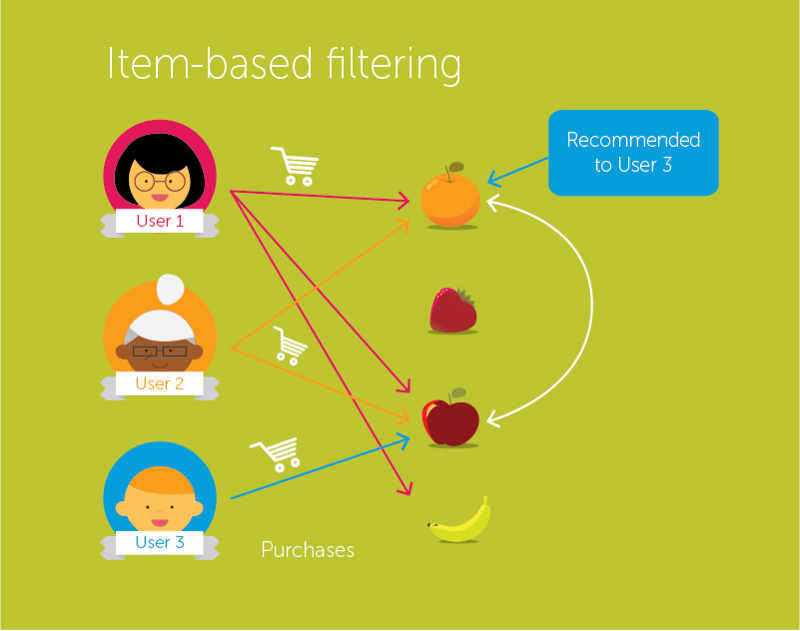

The key difference of memory-based approach from the model-based techniques is that we are not learning any parameter using gradient descent (or any other optimization algorithm). The techniques where we don’t use parametric machine learning approach are classified as Memory based techniques. Therefore, non parametric ML approaches like KNN should also come under Memory based approach. 

In either scenario, we builds a similarity matrix. For user-user collaborative filtering, the **user-similarity matrix** will consist of some distance metrics that measure the similarity between any two pairs of users. Likewise, the **item-similarity matrix** will measure the similarity between any two pairs of items.

There are 3 distance similarity metrics that are usually used in collaborative filtering:
1. **Jaccard Similarity**:
    * Similarity is based on the number of users which have rated item A and B divided by the number of users who have rated either A or B
    * It is typically used where we don’t have a numeric rating but just a boolean value like a product being bought or an add being clicked

2. **Cosine Similarity**: (as in the Content-Based system)
    * Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
    * Closer the vectors, smaller will be the angle and larger the cosine

3. **Pearson Similarity**:
    * Similarity is the pearson coefficient between the two vectors.

For the purpose of diversity, I will use **Pearson Similarity** in this implementation.

### Implementation
I will use the file **ratings.csv** first as it contains User ID, Movie IDs and Ratings. These three elements are all I need for determining the similarity of the users based on their ratings for a particular movie.

First I will do some quick data processing:

In [28]:
# Filling NA value with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Filling NA value with its mean.
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

Due to the limited computing power in my laptop, I will build the recommender system using only a subset of the ratings. In particular, I will take a random sample of 20,000 ratings (2%) from the 1M ratings.

In [30]:
#Randomly sample 1% of the ratings dataset
small_data = ratings.sample(frac=0.02)
#Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 882174 to 122853
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   20004 non-null  int64
 1   movie_id  20004 non-null  int64
 2   rating    20004 non-null  int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(small_data, test_size=0.2)

In [32]:
small_data.shape

(20004, 3)

In [33]:
small_data.dtypes

user_id     int64
movie_id    int64
rating      int64
dtype: object

In [34]:
# Creating two user-item matrices, one for training and another for testing
train_matrix = small_data.to_numpy()
test_matrix = small_data.to_numpy()

# Check their shape
print(train_matrix.shape)
print(test_matrix.shape)

(20004, 3)
(20004, 3)


Now I use the **pairwise_distances** function from sklearn to calculate the [Pearson Correlation Coefficient](https://stackoverflow.com/questions/1838806/euclidean-distance-vs-pearson-correlation-vs-cosine-similarity). This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.

In [35]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(small_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1.         0.97407228 0.68119075 0.40065456]
 [0.97407228 1.         0.49789955 0.18298154]
 [0.68119075 0.49789955 1.         0.94369905]
 [0.40065456 0.18298154 0.94369905 1.        ]]


In [37]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.0179087   0.0095683 ]
 [-0.0179087   1.         -0.06536294]
 [ 0.0095683  -0.06536294  1.        ]]


In [38]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

### Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is **Root Mean Squared Error (RMSE)**. I will use the **mean_square_error (MSE)** function from sklearn, where the RMSE is just the square root of MSE.

$$\mathit{RMSE} =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}$$

I'll use the scikit-learn's **mean squared error** function as my validation metric. Comparing user- and item-based collaborative filtering, it looks like user-based collaborative filtering gives a better result.

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [41]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_matrix, user_correlation, type='user')
item_prediction = predict(train_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_matrix)))

User-based CF RMSE: 695.4160853075994
Item-based CF RMSE: 155.45522930684393


RMSE of training of model is a metric which measure how much the signal and the noise is explained by the model. I noticed that my RMSE is quite big. I suppose I might have overfitted the training data.

Overall, Memory-based Collaborative Filtering is easy to implement and produce reasonable prediction quality. However, there are some drawback of this approach:

* It doesn't address the well-known cold-start problem, that is when new user or new item enters the system. 
* It can't deal with sparse data, meaning it's hard to find users that have rated the same items.
* It suffers when new users or items that don't have any ratings enter the system.
* It tends to recommend popular items.